# References
* [Brief introduction to Python and Jupyter for Machine Learning (ML)](http://github.com/machine-learning-helpers/induction-python), with:
  + [this Altair section on that introduction](http://github.com/machine-learning-helpers/induction-python/tree/master/tutorials/altair)
* [Altair - Exploring Seattle Weather](https://altair-viz.github.io/case_studies/exploring-weather.html)

# [Exploring Seattle Weather](https://altair-viz.github.io/case_studies/exploring-weather.html#exploring-seattle-weather)

In [1]:
from vega_datasets import data

df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


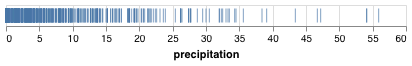

In [2]:
import altair as alt

alt.Chart(df).mark_tick().encode(
    x='precipitation',
)

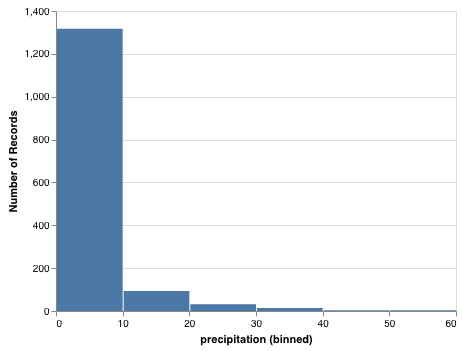

In [3]:
alt.Chart(df).mark_bar().encode(
    alt.X('precipitation', bin=True),
    y='count()'
)

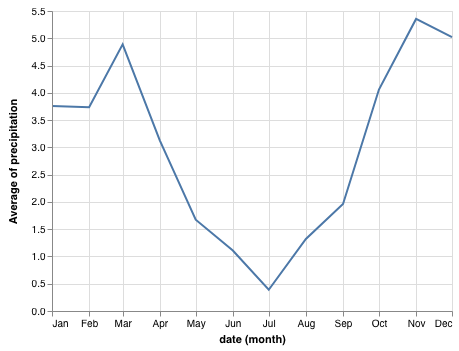

In [4]:
alt.Chart(df).mark_line().encode(
    x='month(date):T',
    y='average(precipitation)'
)

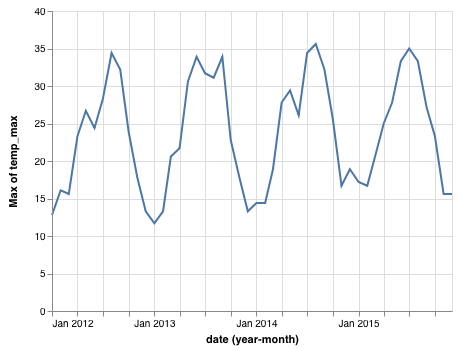

In [5]:
alt.Chart(df).mark_line().encode(
    x='yearmonth(date):T',
    y='max(temp_max)',
)

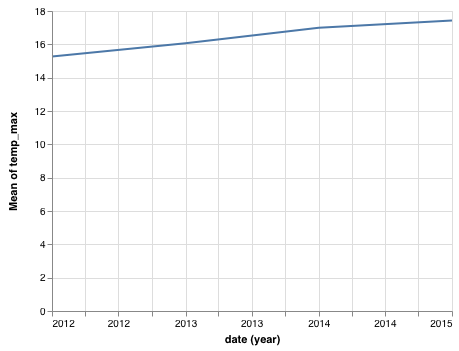

In [6]:
alt.Chart(df).mark_line().encode(
    x='year(date):T',
    y='mean(temp_max)',
)

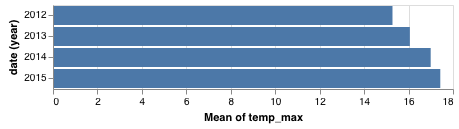

In [7]:
alt.Chart(df).mark_bar().encode(
    x='mean(temp_max)',
    y='year(date):O'
)

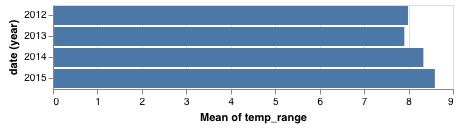

In [8]:
alt.Chart(df).mark_bar().encode(
    x='mean(temp_range):Q',
    y='year(date):O'
).transform_calculate(
    temp_range="datum.temp_max - datum.temp_min"
)

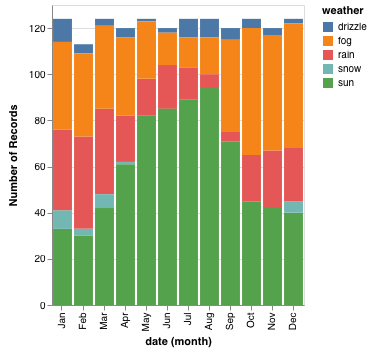

In [9]:
alt.Chart(df).mark_bar().encode(
    x='month(date):N',
    y='count()',
    color='weather',
)

In [10]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

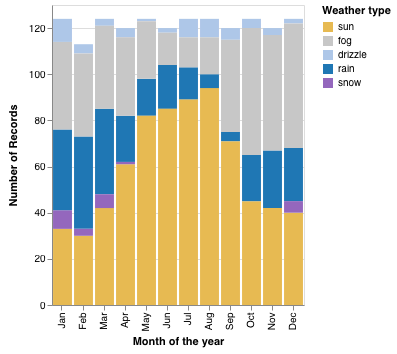

In [11]:
alt.Chart(df).mark_bar().encode(
    x=alt.X('month(date):N', axis=alt.Axis(title='Month of the year')),
    y='count()',
    color=alt.Color('weather', legend=alt.Legend(title='Weather type'), scale=scale),
)

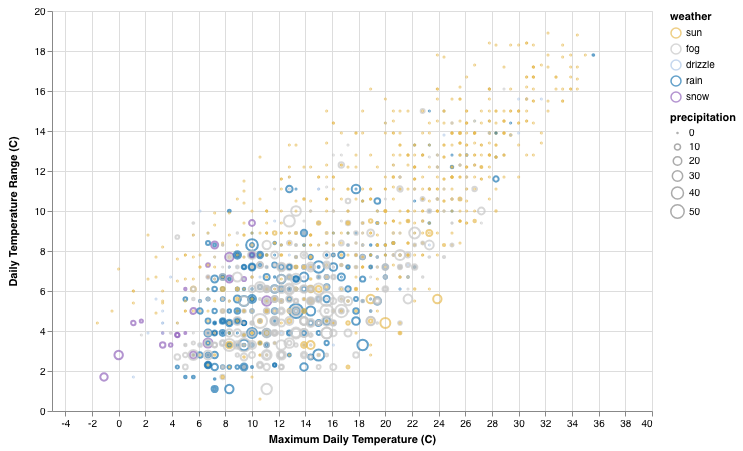

In [12]:
alt.Chart(df).mark_point().encode(
    alt.X('temp_max', axis=alt.Axis(title='Maximum Daily Temperature (C)')),
    alt.Y('temp_range:Q', axis=alt.Axis(title='Daily Temperature Range (C)')),
    alt.Color('weather', scale=scale),
    alt.Size('precipitation', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400
).interactive()

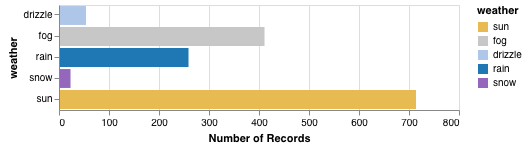

In [13]:
alt.Chart(df).mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
)

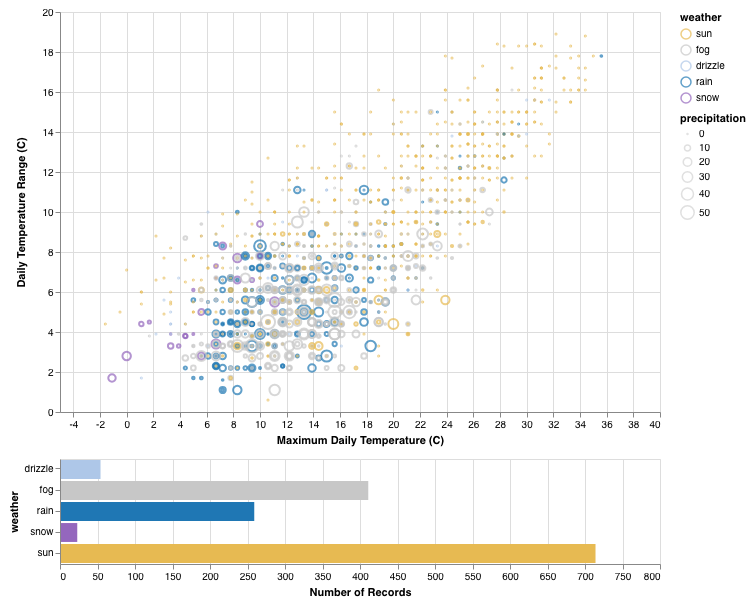

In [14]:
brush = alt.selection(type='interval')

points = alt.Chart().mark_point().encode(
    alt.X('temp_max:Q', axis=alt.Axis(title='Maximum Daily Temperature (C)')),
    alt.Y('temp_range:Q', axis=alt.Axis(title='Daily Temperature Range (C)')),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400
).add_selection(
    brush
)

bars = alt.Chart().mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush
).properties(
    width=600
)

alt.vconcat(points, bars, data=df)